## End of Distribution Imputation
### Definition
is equivalent to arbitrary value imputation, but it automatically selecting arbitrary values at the end of the variable distribution known as outlier.


If the variable is normally distributed, can use the mean plus or minus 3 times the standard deviation(SD)

If the variable is skewed, can use the IQR( Inter-Quantile Range ) proximity rule.

### Which variable is fit for this method?
Suitable numerical variables

### Skewed Distribution
The general approach is to calculate the quantile, and then the inter-quantile range(IQR)

IQR = 75th Quantile - 25th Quantile 

Upper limit = 75th Quantile + IQR x 1.5

lower limit = 25th Quantile - IQR x 1.5

Extreme outliers will time 3 instead of 1.5

### Implementation

#### Import Libraries

In [3]:
%matplotlib inline

import csv
import matplotlib.pyplot as plt
import os
import seaborn as sns
import pandas as pd

#### Read CSV file

In [4]:
userhome = os.path.expanduser('~')
csvfile= userhome + r'/Documents/Coding/Data mining/train.csv'
open(csvfile, "r")

<_io.TextIOWrapper name='/Users/veyseng/Documents/Coding/Data mining/train.csv' mode='r' encoding='UTF-8'>

#### Assign csv data into dataframe

In [5]:
df = pd.read_csv(csvfile)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Find extreme value to fill into missing data of Age

In [7]:
mean = df['Age'].mean()
mean

29.69911764705882

In [8]:
std = df['Age'].std()
std

14.526497332334044

In [9]:
extreme = (mean + (3*std))
extreme

73.27860964406095

#### Figure representation

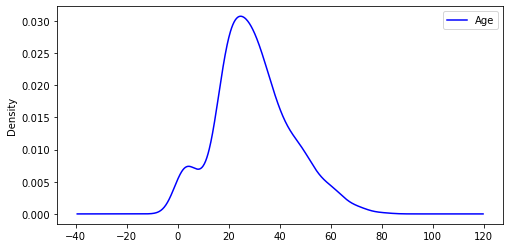

In [10]:
plt.figure(figsize=(8,4))
df.Age.plot(kind='kde',color='b')
plt.legend()

<AxesSubplot:>

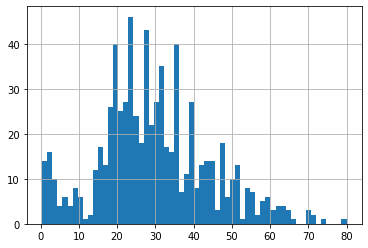

In [11]:
df.Age.hist(bins=60)

/Users/veyseng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

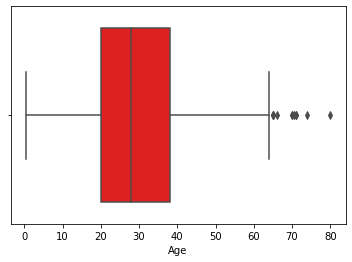

In [12]:
sns.boxplot(df['Age'],color='r')

#### Create Function for filling the missing data

In [23]:
def End_Distribution(data,variable,extreme):
    data[variable+'_Median'] = data[variable].fillna(data[variable].median())
    data[variable+'_End_Distribution'] = data[variable].fillna(extreme)
    data[variable] = data[variable].fillna(extreme)

In [24]:
End_Distribution(df,'Age',extreme)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median,Age_End_Distribution
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


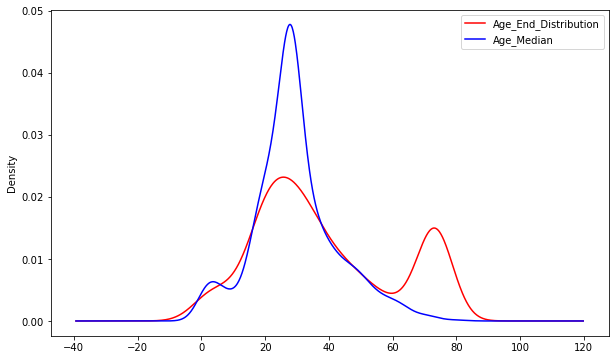

In [26]:
plt.figure(figsize=(10,6))
df.Age_End_Distribution.plot(kind='kde',color='r')
df.Age_Median.plot(kind='kde',color='b')
plt.legend()

/Users/veyseng/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_End_Distribution'>

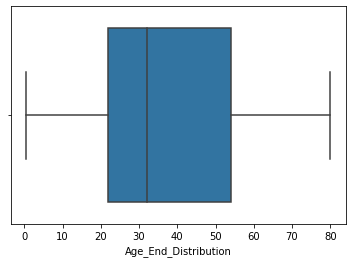

In [27]:
sns.boxplot(df['Age_End_Distribution'])

In [28]:
df.isnull().sum()

PassengerId               0
Survived                  0
Pclass                    0
Name                      0
Sex                       0
Age                       0
SibSp                     0
Parch                     0
Ticket                    0
Fare                      0
Cabin                   687
Embarked                  2
Age_Median                0
Age_End_Distribution      0
dtype: int64

In [29]:
df.Age_End_Distribution[28]

73.27860964406095

#### Export CSV 

In [30]:
df.to_csv("out.csv")